In [66]:
from scipy import ndimage
import os
import imageio

DIR = "images"
xray_image = imageio.v3.imread(os.path.join(DIR,"001.jpg"))
xray_image1 = imageio.v3.imread(os.path.join(DIR,"002.jpg"))
xray_image2 = imageio.v3.imread(os.path.join(DIR,"003.jpg"))
xray_image3 = imageio.v3.imread(os.path.join(DIR,"004.jpg"))


In [67]:

xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1.5)
xray_image_laplace_gaussian1 = ndimage.gaussian_laplace(xray_image1, sigma=1)
xray_image_laplace_gaussian2 = ndimage.gaussian_laplace(xray_image2, sigma=1)
xray_image_laplace_gaussian3 = ndimage.gaussian_laplace(xray_image3, sigma=1)


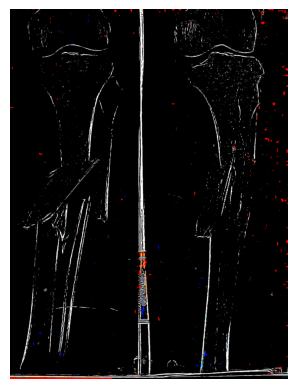

In [35]:
import matplotlib.pyplot as plt

plt.imshow(xray_image_laplace_gaussian, cmap="gray")
plt.axis("off")
plt.show()

In [36]:
from scipy import ndimage

xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1.7)

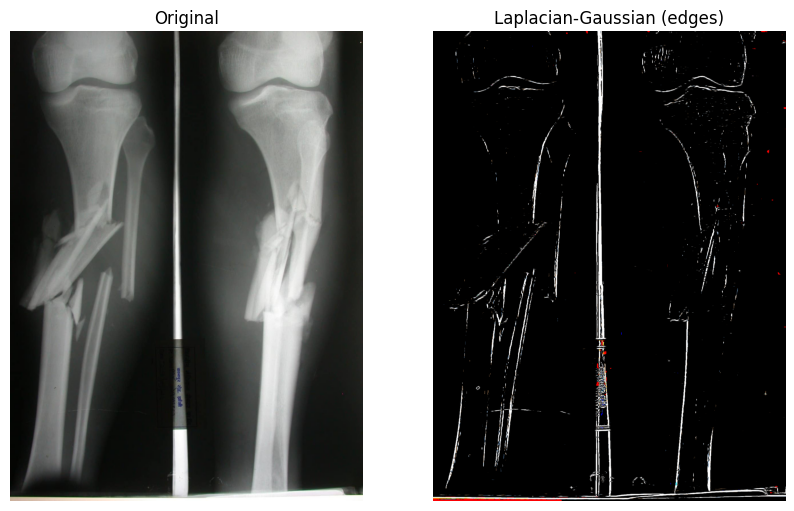

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()


In [41]:
x_ray_image_gaussian_gradient = ndimage.gaussian_gradient_magnitude(xray_image, sigma=2)
x_ray_image_gaussian_gradient1 = ndimage.gaussian_gradient_magnitude(xray_image1, sigma=1.5)

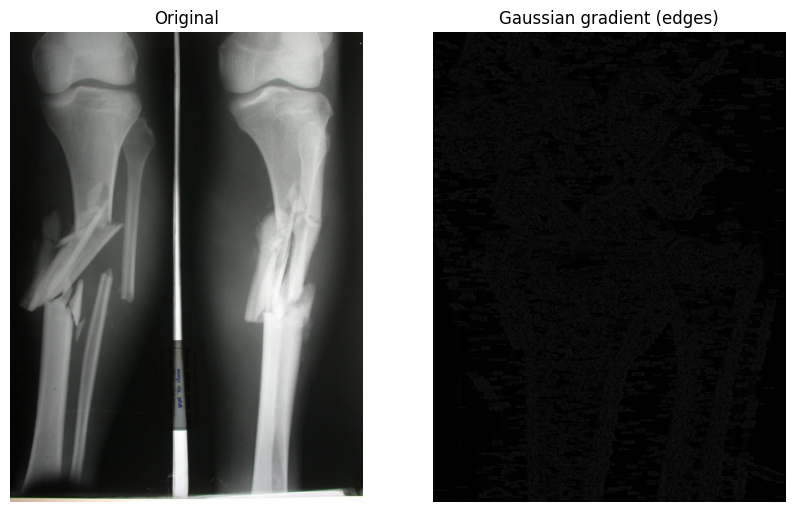

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Gaussian gradient (edges)")
axes[1].imshow(x_ray_image_gaussian_gradient1, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

In [43]:
x_sobel = ndimage.sobel(xray_image, axis=0)
y_sobel = ndimage.sobel(xray_image, axis=1)

xray_image_sobel = np.hypot(x_sobel, y_sobel)

xray_image_sobel *= 255.0 / np.max(xray_image_sobel)

In [44]:
print("The data type - before: ", xray_image_sobel.dtype)

xray_image_sobel = xray_image_sobel.astype("float32")

print("The data type - after: ", xray_image_sobel.dtype)

The data type - before:  float16
The data type - after:  float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


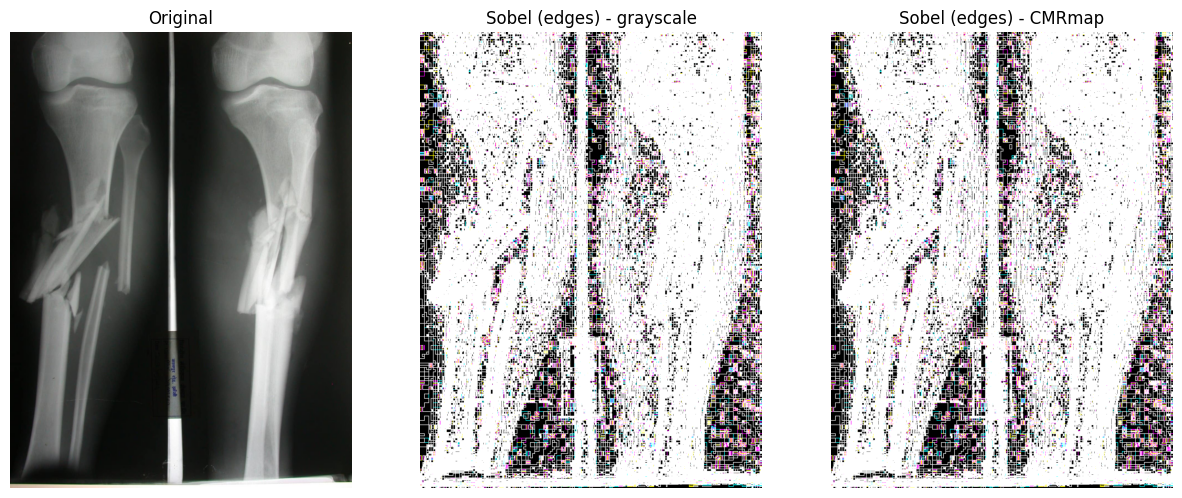

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Sobel (edges) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

In [74]:
fourier_gaussian = ndimage.fourier_gaussian(xray_image3, sigma=0.8)

x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

xray_image_canny = np.hypot(x_prewitt, y_prewitt)

xray_image_canny *= 255.0 / np.max(xray_image_canny)

print("The data type - ", xray_image_canny.dtype)

The data type -  float64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


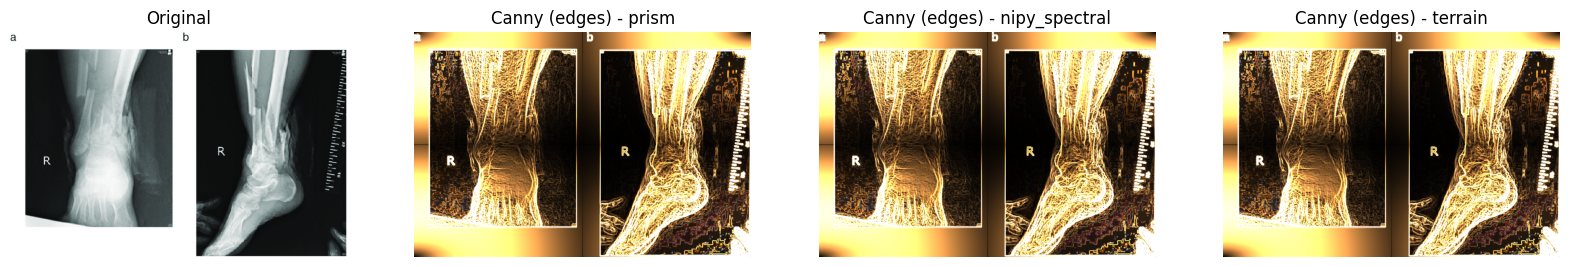

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image3, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap='prism')
axes[2].set_title("Canny (edges) - nipy_spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

In [76]:
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  79.74069596497733
The median pixel value is:  59.0


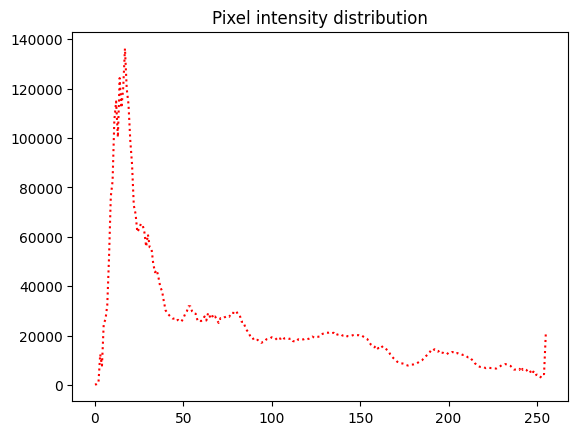

In [86]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution,color='red',linestyle=':')
plt.title("Pixel intensity distribution")
plt.show()

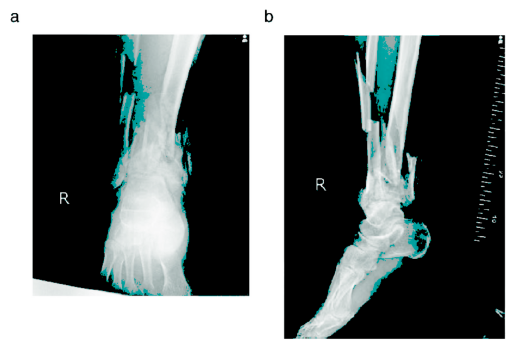

In [89]:
# The threshold is "greater than 150"
# Return the original image if true, `0` otherwise
xray_image_mask_noisy = np.where(xray_image3 > 150, xray_image3, 0)

plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

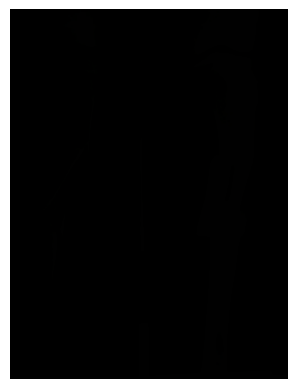

In [100]:
# The threshold is "greater than 150"
# Return `1` if true, `0` otherwise
xray_image_mask_less_noisy = np.where(xray_image > 150, 1, 0)

plt.imshow(xray_image_mask_less_noisy, cmap="prism")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


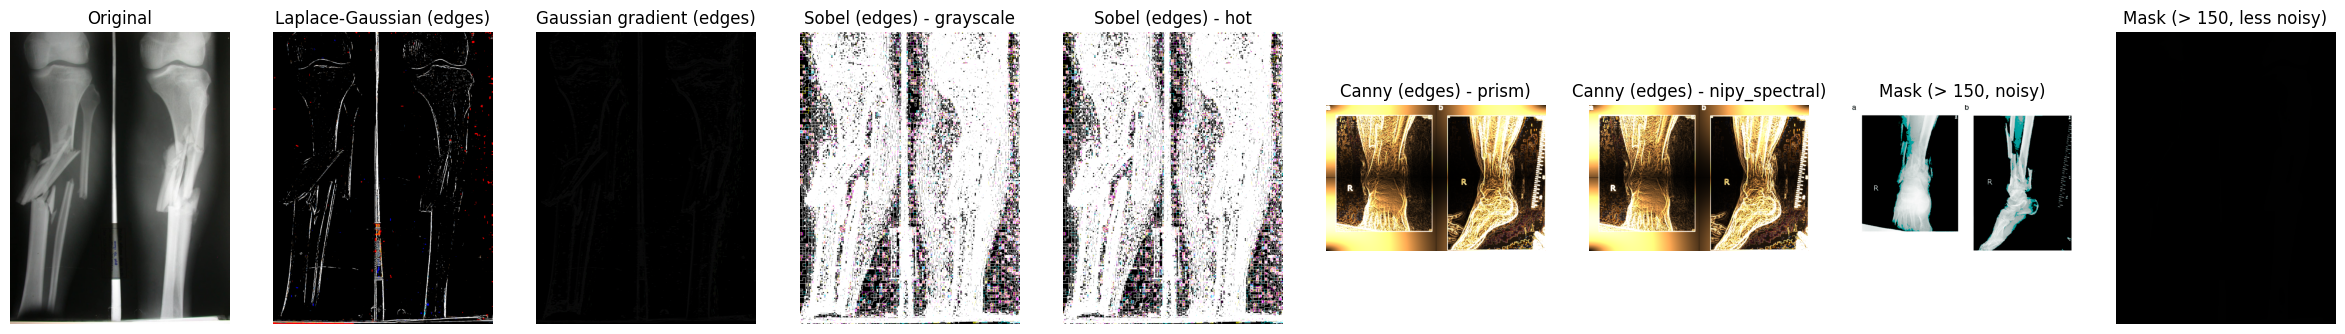

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(x_ray_image_gaussian_gradient, cmap="gray")
axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")
axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")
axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")
axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")
axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")
axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

In [107]:
import wandb
wandb.login(key='1d7212b8bcc5450b9f21b696f68fe2d461403199')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/shyam/.netrc


True

In [108]:
wandb.init(project = 'edge detection of bones') 

BrokenPipeError: [Errno 32] Broken pipe